## Introduction

This tutorial is about retrievaling information from music metadata. It is going to introduce [Million Song Dataset](https://labrosa.ee.columbia.edu/millionsong/), a music data set created by Thierry Bertin-Mahieux and Daniel P.W. Ellis and Brian Whitman and Paul Lamere. The tutorial will also present an example application of this data set. 

First, let's make clear what music metadata is. Roughly speaking, music metadata gives you the information to identify a piece of music without listening to it. It can be a song's title, composer, singer, lyrics, genre, released year, etc. The tags of songs that we often see on music streaming platforms (e.g. Spotify, Apple Music) are the most widely-represented form of music metadata.

Sometimes people overlooked the importance of music metadata. However, the fact is that music metadata is very useful for identifying music and organizing music databases. Imagine there's a database with one billion songs. With "tags", one can easily search for a song and determine whether the result is what he/she wants. If this preson searches with audio features such as tempo and frequency, the process will be very expensive. Therefore, music metadata matters a lot for data scientst or analysts who work in music streaming industry and other relevant industries. Being able to quickly navigate a piece of music and anlayze its metadata, professionals can understand the products and customers better.

The tutorial will walk you through these topics:

1. [Introduction of Datasets](#Introduction-of-Datasets)
     1. [Core Datasets](#Core-Datasets)
     2. [Complementary Datasets](#Complementary-Datasets)  
<br>
2. [Example Application](#Example-Application)
    1. [Data Preprocessing](#Data-Preprocessing)
    2. [Data Loading](#Data-Loading)
    3. [Data Analysis](#Data-Analysis)
    4. [Lyrics Visualization](#Lyrics-Visualization)  
<br>
3. [References](#References)

Let's begin!

## Introduction of Datasets

Million Song Dataset includes metadata and audio features of one million popular music. It consists of a core dataset provided by [The Echo Nest](http://the.echonest.com/) and complementary datasets provided by the community. We'll have a glance at most of the datasets and then use some of them to do a simple analysis of lyrics.

### Core Datasets

The Core Dataset stores audio features and metadata for song tracks, one [HDF5](https://support.hdfgroup.org/HDF5/doc/H5.intro.html) file for each track. The Million Song website provides [an existing program](https://github.com/tbertinmahieux/MSongsDB/tree/master/PythonSrc) to open these files.

If you really want to explore them yourself, you can download all the .py files in the program's directory, and install a python package called [tables](https://pypi.python.org/pypi/tables). Run `display_song.py` as this:

    `python display_song.py TRAAADZ128F9348C2E.h5`
   
But here is the result I got. Below is the data of a song called *Amor De Cabaret* from singer Sonora Santanera.

> analysis_sample_rate: 22050<br/>
artist_7digitalid: 290021<br/>
artist_familiarity: 0.487356790928<br/>
artist_hotttnesss: 0.343428378297<br/>
artist_id: b'ARKRRTF1187B9984DA'<br/>
artist_latitude: nan<br/>
artist_location: b''<br/>
artist_longitude: nan<br/>
artist_mbid: b'7a273984-edd9-4451-9c4d-39b38f05ebcd'<br/>
artist_mbtags: shape = (0,)<br/>
artist_mbtags_count: shape = (0,)<br/>
artist_name: b'Sonora Santanera'<br/>
artist_playmeid: 13951<br/>
artist_terms: shape = (10,)<br/>
artist_terms_freq: shape = (10,)<br/>
artist_terms_weight: shape = (10,)<br/>
audio_md5: b'fa329738005ca53715d9f7381a0d1fe3'<br/>
bars_confidence: shape = (291,)<br/>
bars_start: shape = (291,)<br/>
beats_confidence: shape = (291,)<br/>
beats_start: shape = (291,)<br/>
danceability: 0.0<br/>
duration: 177.47546<br/>
end_of_fade_in: 0.282<br/>
energy: 0.0<br/>
key: 8<br/>
key_confidence: 0.643<br/>
loudness: -9.689<br/>
mode: 1<br/>
mode_confidence: 0.565<br/>
release: b'Las Numero 1 De La Sonora Santanera'<br/>
release_7digitalid: 514953<br/>
sections_confidence: shape = (8,)<br/>
sections_start: shape = (8,)<br/>
segments_confidence: shape = (562,)<br/>
segments_loudness_max: shape = (562,)<br/>
segments_loudness_max_time: shape = (562,)<br/>
segments_loudness_start: shape = (562,)<br/>
segments_pitches: shape = (562, 12)<br/>
segments_start: shape = (562,)<br/>
segments_timbre: shape = (562, 12)<br/>
similar_artists: shape = (100,)<br/>
song_hotttnesss: nan<br/>
song_id: b'SOXVLOJ12AB0189215'<br/>
start_of_fade_out: 172.304<br/>
tatums_confidence: shape = (582,)<br/>
tatums_start: shape = (582,)<br/>
tempo: 100.07<br/>
time_signature: 1<br/>
time_signature_confidence: 0.0<br/>
title: b'Amor De Cabaret'<br/>
track_7digitalid: 5703798<br/>
track_id: b'TRAAADZ128F9348C2E'<br/>
year: 0<br/>

For fields whose values are numpy arrays, this program displays them as the shapes of the arrays. Note that the actual values of these fields stored in the files are arrays, not shapes of arrays.

Some fields in the file refers to fields in additional files (see list below), which works similarly as foreign keys in relational database. For example, the field artist_id relates to another file storing all artist ID and names.

For more explanations, please check [here](https://labrosa.ee.columbia.edu/millionsong/pages/field-list).

Apart from the main files above, we also have some additional files in the Core Dataset. The list below is taken from [Million Song's introduction to its subsets](https://labrosa.ee.columbia.edu/millionsong/pages/getting-dataset#subset).

>- all track Echo Nest ID. Format: track_id, song_id, artist_name, song_title<br/>
- all artist ID. Format: artist_id, artist_mbid, track_id, artist_name<br/>
- all unique artist terms (Echo Nest tags)<br/>
- all unique artist musicbrainz tags<br/>
- the 515.576 tracks for which we have the year information, ordered by year<br/>
- artists for which we know latitude and longitude<br/>
- SQLite database containing most metadata about each track (NEW VERSION 03/27/2011).<br/>
- SQLite database linking artist ID to the tags (Echo Nest and musicbrainz ones).<br/>
- SQLite database containing similarity among artists.<br/>
 
As we mentioned earlier, the field `artist_id` of artist ID files links to the field `artist_id` of the main files. 

### Complementary Datasets

The complementary datsets provided by Million Song are:
> - SecondHandSongs dataset -> cover songs<br/>
- musiXmatch dataset -> lyrics<br/>
- Last.fm dataset -> song-level tags and similarity<br/>
- Taste Profile subset -> user data<br/>
- thisismyjam-to-MSD mapping -> more user data<br/>
- tagtraum genre annotations -> genre labels<br/>
- Top MAGD dataset -> more genre labels<br/>

Let's take [musiXmatch dataset](https://labrosa.ee.columbia.edu/millionsong/musixmatch) as an example. 

A text file from musiXmatch with x lines looks like this:<br/>
Line 1 ~ a:  /# - comment, ignore<br/>
Line a + 1:  %word1, word2,... - list of top words (stemmed), in popularity order<br/>
Line (a + 2) ~ x:  TID, MXMID, idx:cnt, idx:cnt,... 

Note: 
1. TID represents track ID that's from Million Song Dataset, MXMID represents track ID that's from musiXmatch.
2. idx is the index of a word in the lsit of top words, cnt is the count of times this words occurred in the lyrics.

## Example Application
### Keywords of Lyrics By Genres

Now that we've seen how the datset is constructed, we're ready to dive deeper into it!

Popular music is not just about audio contents. Most of the time, lyrics help singers to convey a complete story. You may have a vague impression that pop music talks a lot about love, punk always has anger, and electronic...(what is electronic about??). Is it true? Isn't it interesting to know what these songs are actually talking about? By counting the most frequent keywords from lyrics of songs in different genres, you'll be able to answer these question. 

Our lyrics data is from the musixMatch dataset. Other data is from the complementary datasets of mentioned above. We will be joining these data together, and then perform our analysis.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt
from adjustText import adjust_text
nltk.download('stopwords') # only need to run once
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Preprocessing

We're using four files here, you can find their schemas in previousd sections.
1. track_lyrics.txt -> manually extracted from the text file from the musixMatch dataset.   The extracted part starts at the first line after the line of word list.
2. artists_name_id.txt -> a text file from the additional files of Core Dataset.
3. artit_term.db -> a sqlite database from the addional files of Core Dataset.
4. topwords.txt -> manually extracted from the line of word list in the text file from musiXmatch.

The basic idea is to integrate the information from these files and group the integrated data by genre. Our analyis of lyrics will be done on different genres.

So the first step is to load data into our database. But before that we need to do some preprocessing. While the structure of `artists_name_id.txt` meets the requirements of relational database perfectly, we have a little problem with `track_lyrics.txt`. In `track_lyrics.txt` the number of values (seperated by comma) in each line is different, meaning that if we simply load this file as what it is now we will have different numer of columns for records in the table. The reason is that the length of lyrics of songs are different. One solution is to combine all `idx:cnt` values together to get a complete piece of lyrics. So our `tack_lyrics` table will have two columns: `track id, lyrics`. This step is implemented in the method `create_track_lyrics_file()`.

Since the "lyrics" in `track_lyrics.txt` are represented with index of words (the position of that word in the word list), we want to have the word list so that we can convert the index to actual words later. As mentioned before, Million Song has embedded this word list in the first few lines of `track_lyrics.txt`. For simplicity, we just manually extract it to a file called "topwords.txt". The method `get_lyrics()` reads `topwords.txt` and stores the words in a list.

Now we have the index of words in lyrics and the words themselves. But are all these words meaningful to us? No. Most of the words in lyrics won't help. For example, "the", "a", "i" tell nothing about a story of lyrics. So we have the method `get_stop_words()` to get stop words from NLTK library.

In [2]:
def create_track_lyrics_file(original_file):
    """ Create a new text file, all tokens in lyrics are concatenated with "|"
    Inputs:
        original_file: string: the orginal file containing track id and lyrics
    Outputs:
        string: the path of new file, since the default path is in current directory,
                we simply returns the name of the new file
    """
    with open (original_file, "r", encoding="utf-8") as from_file, open("new_track_lyrics.txt", "w", encoding="utf-8") as to_file:
        for line in from_file:
            lst = line.split(",")
            track_id = lst[0]
            lyric_pair = '|'.join(lst[2:]) # tokens starts from index 2
            to_file.write(track_id + "," + lyric_pair)
    return "new_track_lyrics.txt"

new_track_lyrics = create_track_lyrics_file("track_lyrics.txt")

In [35]:
def get_lyrics(topwords_file):
    """ Get the actual words in lyrics
    Inputs: 
        topwords_file: string: the name of the file containing topwords
    Outputs: 
        list(str): a list of words in lyrics   
    """
    lyrics = []
    with open(topwords_file, "r", encoding="utf-8") as file:
        for line in file:
            lyrics += line.split(",")
    return lyrics

original_lyrics = get_lyrics("topwords.txt")

In [16]:
def get_stop_words():
    """ Get stop words from NLTK
    Inputs: None
    Outputs:
        list(str): a list of stop words
    """
    return nltk.corpus.stopwords.words('english')

stop_words = get_stop_words()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Loading

We'll be using the database `artist_term.db` that we downloaded from Million Song Dataset, and loading the `new_track_lyrics` file and `artists_name_id` file into this database.

In [5]:
# connect to the database
conn = sqlite3.connect("artist_term.db")
cursor = conn.cursor()

In [6]:
def create_tables(new_track_lyrics):
    """ Create two tables: track_lyrics, artist_name_id
    Inputs: 
        string: the path of new track lyrics file
    Outputs: None
    """
    # create track_lyrics table
    cursor.execute("DROP TABLE track_lyrics")
    cursor.execute("CREATE TABLE track_lyrics (msd_tid TEXT PRIMARY KEY, lyrics TEXT)")
    with open (new_track_lyrics, encoding="utf-8") as lyrics_file:
        for line in lyrics_file:
            lst = line.strip().split(",")
            cursor.execute("INSERT INTO track_lyrics VALUES (?,?)", tuple(lst))
    # create artist_name_id table
    cursor.execute("DROP TABLE artist_name_id")
    cursor.execute("CREATE TABLE artist_name_id (artist_id TEXT, artist_mbid TEXT, track_id TEXT, artist_name TEXT)")
    with open ("artists_name_id.txt", encoding="utf-8") as lyrics_file:
        for line in lyrics_file:
            lst = line.strip().split("<SEP>")
            cursor.execute("INSERT INTO artist_name_id VALUES (?,?,?,?)", tuple(lst))
            
create_tables(new_track_lyrics)

In [7]:
# Save changs
conn.commit()

### Data Analysis

Before analyzing data, we want to check our database and make sure we are clear about its structure. The method `get_tables_info()` lists each table's name and the name of their columns.

We're joining three tables: `track_lyrics, artist_name_id, artist_term`. After joining, we'll have lyrics, artist name, and genre for each track.The method `get_songs_info()` joins the tables and returns a pandas dataframe containing the information we want. 

Then we'll count the number of tracks for each genre to get a list of the most popular genres. For each genre, we select 50 words that occurred most frequently in lyrics. The result is returned by the method `get_popular_genre_words()`.

In [8]:
def get_tables_info():
    """ Get the names of tables and their columns in the database.
    Inputs: None
    Outputs: 
        dictionary: name of table is key, a list of names of their columns is value
    """
    table_info = {}
    for name_tp in cursor.execute("SELECT name FROM sqlite_master WHERE type='table'"):
        new_cursor = conn.execute('SELECT * FROM {}'.format(name_tp[0]))
        column_names = [description[0] for description in new_cursor.description]
        #cursor.execute('PRAGMA TABLE_INFO({})'.format(name_tp[0]))
        #column_names = [tp[1] for tp in cursor.fetchall()] 
        table_info[name_tp[0]] = column_names
    return table_info

table_info_dict = get_tables_info()
for k, v in table_info_dict.items():
    print(k,v)

artists ['artist_id']
terms ['term']
artist_term ['artist_id', 'term']
mbtags ['mbtag']
artist_mbtag ['artist_id', 'mbtag']
track_artist ['msd_tid', 'artist_name_msd', 'title_msd', 'mxm_tid', 'artist_name_mxm', 'title_mxm']
track_lyrics ['msd_tid', 'lyrics']
artist_name_id ['artist_id', 'artist_mbid', 'track_id', 'artist_name']


In [9]:
def get_top_words(x):
    """ A helper function for get_songs_info(). 
        Select the index of 3 words that occurred most times in lyrics for each track.
    Inputs: 
        string: a concatenated version of lyrics, e.g. "a|b|c"
    Outputs: 
        list(string): a list of sorted word-count pair, containing the index 
                      of 3 most frequent words and their counts in lyrics
    """
    lst = x.split("|")
    sort = sorted(lst, key=lambda x: int(x.split(":")[1]), reverse=True)
    return sort[:3]

In [10]:
def get_songs_info():
    """ Get the information of tracks
    Inputs: None
    Outputs: 
        pandas dataframe: contains the information of tracks
    """
    join_query = """SELECT msd_tid, lyrics, artist_name, term FROM 
    track_lyrics JOIN artist_name_id ON track_lyrics.msd_tid = artist_name_id.track_id
    JOIN artist_term ON artist_name_id.artist_id = artist_term.artist_id"""

    my_df = pd.read_sql(join_query, conn)
    # add a column to df: top 3 words
    my_df['top_words_count'] = my_df['lyrics'].apply(get_top_words)
    return my_df

songs_info_df = get_songs_info()

In [11]:
def get_popular_genre_words(songs_info_df):
    """ Get the most popular 10 genres and the most popular 50 words in lyrics for each genre
    Inputs: 
        songs_info_df: pandas dataframe: the dataframe that contains the information about tracks
    Outputs:
        list(string): a list of the most popular genres, sorted by the number of their tracks
        dictionary: the name of genre is key, a list of the most popular words for that genre is value
    """
    genre_top_words = {}
    genre_count = []
    for name, group in songs_info_df.groupby(by='term'):
        # count the number of tracks for each genre
        genre_count.append((name, len(group)))
        # count the occurence of words in lyrics, only top 3 words of lyrics are considered.
        total_words_count = defaultdict(int)
        for lyrics in group['top_words_count']:
            for pair in lyrics:
                total_words_count[int(pair.split(":")[0])] += int(pair.split(":")[1])
        # sort the words by the number of times the occurred, in descending order
        top_words_genre = sorted(total_words_count.keys(), key=lambda x:total_words_count[x], reverse=True)
        top_50_words_genre = top_words_genre[:50]
        # create the dictionary: {genre name: [(most popular word, count)]}
        top_50_words_count = [(word, total_words_count[word]) for word in top_50_words_genre]
        genre_top_words[name] = top_50_words_count
    
    # sort the genres by the number of tracks they have, in descending order
    sort_genre_count = sorted(genre_count, key=lambda x: x[1], reverse=True)
    top_genre = [genre for genre, count in sort_genre_count[:10]]
    return top_genre, genre_top_words

Let's see what genres are most popular in the world!

In [127]:
popular_genre, genre_top_words = get_popular_genre_words(songs_info_df)
print(popular_genre)

['rock', 'pop', 'electronic', 'alternative rock', 'alternative', 'indie', 'pop rock', 'punk', 'hip hop', 'indie rock']


The result we get aligns with our intuition. If we further have a look at the mainstream charts such as Billboard Hot 100, we'll get a very close conclusion.

### Lyrics Visualization

We'll be ploting a simplified version of word cloud, where the size of texts depends on the times that the word occurred and the position of texts on the plot is random. The method `draw_word_cloud()` implements the visualization.

We use an external library called `adjustText` to avoid texts overlapping in the plot.

In [112]:
def draw_word_cloud(genre, genre_top_words):
    """ Draw a word coud for top words in lyrics
    Inputs: 
        genre: list(string): a slit of names of genres
        genre_top_words: dictionary: the name of genre is key, 
                                     a list of the most popular words for that genre is value
    Outputs: None
    """
    # convert word indexes to actual words, excluding stop words
    true_top_words = [(original_lyrics[word_count[0]], word_count[1]) for word_count in genre_top_words[genre] 
                  if original_lyrics[word_count[0]] not in stop_words]
    # draw word cloud
    default_font_size = 60
    max_count = true_top_words[0][1]
    x, y = np.random.random((2,len(true_top_words)))
    texts = []
    for idx in range(len(true_top_words)):
        pair = true_top_words[idx]
        # the font size of words depends on their frequency
        curr_font_size = int(default_font_size*(pair[1]/max_count))
        if curr_font_size < 20:
            curr_font_size = 20
        texts.append(plt.text(x[idx], y[idx], true_top_words[idx][0], fontsize=curr_font_size, color='b'))
    # avoid texts overlapping
    adjust_text(texts)
    # add a title
    plt.title('Top Words in {} Songs'.format(genre.title()), fontsize=15)


Now let's see what we get for the 3 most popular genres: rock, pop, electronic!

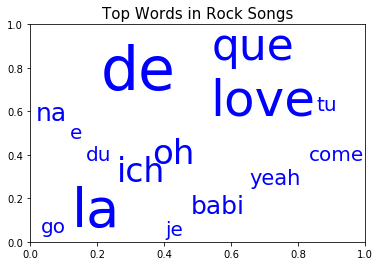

In [114]:
draw_word_cloud("rock", genre_top_words)

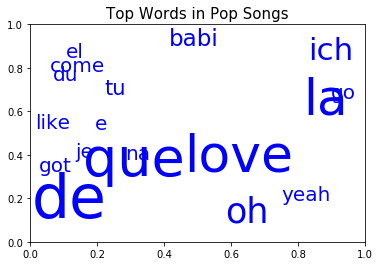

In [116]:
draw_word_cloud("pop", genre_top_words)

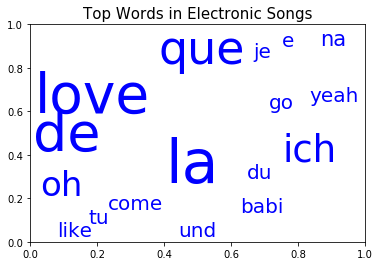

In [117]:
draw_word_cloud("electronic", genre_top_words)

Surprisingly, the top words in the lyrics of rock songs, pop songs and electronic songs are almost same. This might indicate that there are some common topics that most mainstream singers like to cover. One of the topics is love.

How about less popular genres?

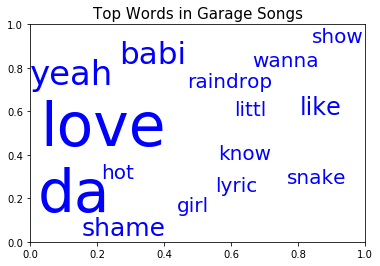

In [118]:
draw_word_cloud("garage", genre_top_words)

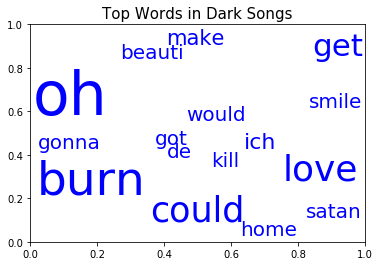

In [119]:
draw_word_cloud("dark", genre_top_words)

Apparently, the top words for less popular genres are different. We can see words like "kill", "burn" and "satan" for the "dark" genre. But we still have "love"!

The top words of lyrics have changed over decades. Below is the comparison of songs from 30s, 60s, and 00s.

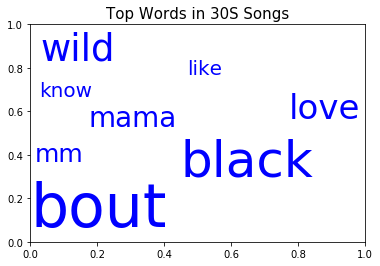

In [120]:
draw_word_cloud("30s", genre_top_words)

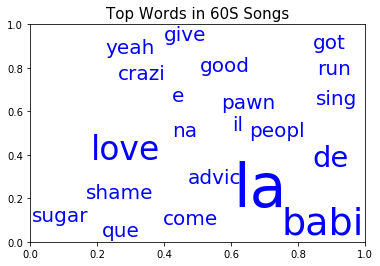

In [124]:
draw_word_cloud("60s", genre_top_words)

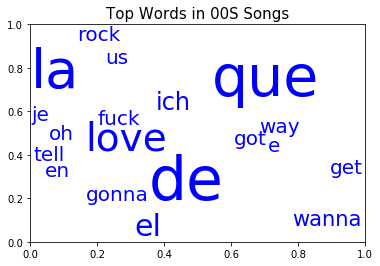

In [126]:
draw_word_cloud("00s", genre_top_words)

## References

This tutorial uses external resources including datasets, packages and stackoverflow. If you're interested in the topics we've discussed, you can find more information from the sites below.

1. Million Song Dataset: 
  https://labrosa.ee.columbia.edu/millionsong/
2. musiXmatch Dataset: 
  https://labrosa.ee.columbia.edu/millionsong/musixmatch
3. HDF5 File Opening Program:
  https://github.com/tbertinmahieux/MSongsDB/tree/master/PythonSrc
4. adjustText Library:
  https://github.com/Phlya/adjustText/blob/master/examples/Examples.ipynb
5. Query columns names in a SQLite database:
  https://stackoverflow.com/questions/7831371/is-there-a-way-to-get-a-list-of-column-names-in-sqlite